### **Config**

In [80]:
import os
import sys

sys.path.insert(0, '/home/marco/epfl/magma/')
import config

In [81]:
MODEL = 'pegasus'

# Output path
OUTPUT_PATH = config.MAGMA_DIR+'pipeline/bullet_points_creation_thesis/'+MODEL+'/'
if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

### **Init**

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import re
import pandas as pd
import nltk
import gensim
from textwrap import fill
from tqdm import tqdm
tqdm.pandas()

if 'pegasus' in MODEL:
    from transformers import PegasusTokenizer
    tokenizer =\
        PegasusTokenizer.from_pretrained('google/pegasus-large')
elif 'bart' in MODEL:
    from transformers import BartTokenizer
    tokenizer =\
        BartTokenizer.from_pretrained('facebook/bart-large-cnn')
elif 't5' in MODEL:
    from transformers import T5Tokenizer
    tokenizer =\
        T5Tokenizer.from_pretrained('t5-large')

### **Thesis Text**

In [83]:
text_thesis = [
"""
Introdution. This thesis is about the Master's Project in industry I conducted at Magma
Learning Sàrl from the 28th of September 2020 to the 26th of March 2021. The Master's Project
was supervised by Dr. Maxime Gabella, Founder and CEO of Magma Learning,
and Professor Martin Jaggi, Tenure Track Assistant Professor at the Machine
Learning and Optimization Laboratory (MLO) at the École polytechnique fédérale
de Lausanne (EPFL).
""",
"""
Background. Magma Learning Sàrl is a young start-up created in 2019 in Switzerland, it has
the mission to radically enhance learning thanks to artificial intelligence. It is
set up as a multidisciplinary research project to understand how humans learn,
how machines learn, and how they can learn from each other. The company is
currently active in enhancing both corporate and education learning through
an AI tutor called ARI 9000 which comes in the form of a mobile and web
application. It automatically generates micro-learning content based on training
material; adapts to the interests, knowledge level and memory abilities of the user; consolidates long-term retention and gives
visual feedbacks on the learning progress. ARI 9000 exploits machine learning
techniques, in particular Natural Language Processing (NLP), to create exercises,
puzzles and topic modeling visualizations.
""",
"""
The MLO is active in the field of machine learning, optimization algorithms and
text understanding, as well as several other application domains. The alignment
of the research interests of the laboratory with those of Magma Learning Sàrl in
the field of NLP is the starting point for their collaboration to supervise the Master's Project.
""",
"""
NLP is a discipline spanning from linguistic to computer science. It concerns
the interaction between computers and human language, in particular how to
automatically process, analyze and generate natural language dataII . The result is
a computer capable of understanding the lexical, syntactic and semantic levels of
language. Some examples of application are summarization, automatic speech
recognition, grammatical error correction, machine translation, part-of-speech
tagging. The most studied tongue in NLP is English.
""",
"""
Problem Statement. ARI 9000 produces personalized exercises thanks to a variety of algorithms.
Figure 1.1 presents an exercise taken directly from the app. The starting material
is either input by the user or scraped from the net and it comes in the form of
natural language. A good example is a textbook. One key component in the
creation of such exercises is the extraction of key passages from the material,
which is often long and complex. This can be achieved with Automatic Text
Summarization (ATS).
""",
"""
The main objective of an ATS system is to produce a summary that includes
the main concepts in the input document in less words and to keep repetition to
a minimum (Moratanch & Chitrakala, 2017; Radev et al, 2002). According to El-Kassas et al (2020), ATS systems are designed by applying extractive, abstractive
or hybrid summarization. The extractive approach selects the most important
sentences from the input text and uses them to generate the summary. The
abstractive approach represents the input text in an intermediate form then
generates the summary with words and sentences that differ from the original
text. The hybrid approach combines both extractive and abstractive approaches.
ATS poses many challenges to the research and industry communities, such as
identification of the most informative segments in the input text to be included in
the generated summary, summarization of long documents like books, evaluation
of the computer-generated summary, generation of an abstractive summary
similar to a human-produced one (El-Kassas et al, 2020).
""",
"""
Deep learning has been successfully applied to various NLP tasks. The ATS
problem is commonly solved by a Sequence-to-Sequence (Seq2Seq) model, this
type of model takes a sequence of items (e.g. words, letters, tokens, ...) as input
and outputs another sequence of items which makes up the summary. Recurrent
Neural Network (RNN), Long Short-Term Memory (LSTM) and gated recurrent
neural networks have been firmly established as state of the art approaches
in sequence modeling such as ATS. A revolutionary new approach has been
introduced by Vaswani et al (2017), who proposed the Transformer, a model
architecture avoiding recurrence and instead relying entirely on an attention
mechanism to draw global dependencies between input and output, which allows
for significantly more parallelization. Transformers are pervasive and have made
tremendous impact in many fields such as NLP and image processing. The
attention mechanism is a key defining characteristic of Transformer models.
However, a well-known concern with attention is the quadratic time and memory
complexity, which can mine model scalability in many settings, such as ATS of
long documents (Tay et al, 2020).
""",
"""
The evaluation of the computer-generated summaries is another important
point in ATS. Even simple manual evaluation of summaries on a large scale
over a few linguistic quality questions and content coverage as in the Document
Understanding Conference (DUC) (Over, 2003) would require over 3,000 hours of
human efforts (Lin, 2004). Therefore, how to evaluate summaries automatically
is a key research aspect of ATS.
""",
"""
The Master's Project has the objective to explore the application of ATS systems, with an accent on Transformer models, to automatically summarize and evaluate long text
document in industrial environment. In particular, it tackles the main problem of
Automatic Text Summarization while facing the issues of long input documents,
quadratic time and space complexity of the attention mechanism and automatic
evaluation of computer-generated summaries.
""",
"""
Literature Review. In this Chapter the theoretical concepts which make up the foundations of the
Master's Project are explained. Section 2.1 introduces the self-attention mechanism, Section
2.2 presents the most popular Transformer models in ATS and Section 2.3 focuses
on the evaluation metrics in ATS.
""",
"""
Self-Attention and Transformer. The attention mechanism introduced by Vaswani et al (2017) is the self-attention,
also known as intra-attention. Self-attention has been used successfully in a variety of tasks including reading comprehension, abstractive summarization, textual
entailment and learning task-independent sentence representations (Vaswani
et al, 2017). The Transformer is the first model relying entirely on self-attention
to compute representations of its input and output without using RNN or convolution.
""",
"""
In the Transformer, the encoder maps an input sequence of symbol representations (x1 , ..., xn) to a sequence of continuous representations z = (z1, ..., zn).
Given z, the decoder then generates an output sequence (y1, ..., ym) of symbols
one element at a time. At each step the model is auto-regressive, consuming
the previously generated symbols as additional input when generating the next.
The Transformer follows this overall architecture using stacked self-attention and
point-wise, fully connected layers for both the encoder and decoder, shown in
the left and right halves of Figure 2.1, respectively.
""",
"""
Encoder and Decoder Stacks
The encoder is composed of a stack of N identical layers. Each layer has two
sub-layers. The first is a multi-head self-attention mechanism, and the second
is a simple, position-wise fully connected feed-forward network. This consist
of two linear transformations with an activation function in between, which is
generally ReLU:
FFN(x) = max(0, xW1 + b1)W2 + b2
The linear transformations use different parameters from layer to layer. Residual
connection is employed around each of the two sub-layers, followed by layer
normalization.
""",
"""
The decoder is also composed of a stack of N identical layers. In addition to the
two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which
performs multi-head attention over the output of the encoder stack. Residual
connections around each of the sub-layers, followed by layer normalization, are
used. The self-attention sub-layer in the decoder stack is masked to prevent
positions from attending to subsequent positions. This masking, combined with
the fact that the output embeddings are offset by one position, ensures that the
predictions for position i can depend only on the known outputs at positions
less than i . All sub-layers in the model, as well as the embedding layers, produce
outputs of dimension dmodel , which is set to 512 by Vaswani et al (2017).
""",
"""
Multi-Head Attention.
An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values and output are vectors.
""",
"""
The most popular attention mechanism is the one introduced by Vaswani et al.
(2017) and it is called Scaled Dot-Product Attention. The input consists of queries
and keys of dimension dk and values of dimension dv . The weights on the values
are computed by applying softmax to the dot products of the query with all keys,
each divided by sqrt(dk) . In practice, the attention function is calculated on a set of
queries simultaneously, stacked together into a matrix Q. The keys and values
are also stacked into matrices K and V :
The matrix multiplication QK T must be integrally computed and stored. Thus,
the time and memory complexity is O(n2)
, where n is the input length (e.g.
number of tokens in the input text document). This is the source of time and
GPU memory constraints encountered during the Master's Project, as in Section
3.4.4.
""",
"""
The query, key and value vectors are abstractions that are useful for calculating
and thinking about attention. As an example, the process is described and visualized in Figure 2.3 for the sentence "Thinking Machines". First, a query, a key and
a value vector are created from the words' embeddings. Now, the self-attention is
calculated for each word. Focusing on the "Thinking" word, all words of the input
sentence are scored against this word. The score is calculated by taking the dot
product of the query vector with the key vector of the respective word to score
(q1*kk, q1*k2). The score determines how much focus to place on other parts of
the
 input
 while "Thinking" is encoded. Then, the results are divided by a constant
3p  ́dk and passed through softmax. Then, the softmax result is multiplied by
the value vector. The intuition here is to keep intact the values of the important
words and drown-out irrelevant word. Figure 2.3 shows how the value vector of
"Machines" is kept less into consideration because its softmax value is only 0.12,
thus vector v2 is more transparent than v1. Finally, the results are summed.
"""
"""
Instead of performing a single attention function with dmodel-dimensional keys,
values and queries, Vaswani et al (2017) found it beneficial to linearly project
the queries, keys and values h times with different, learned linear projections to
dk , dk and dv dimensions, respectively. On each of these projected versions of
queries, keys and values the attention function is performed in parallel, yielding
dv-dimensional output values. These are concatenated and once again projected,
resulting in the final values, as depicted in the left side of Figure 2.2. The right side
of Figure 2.2 shows multi-head attention, which allows the model to jointly attend
to information from different representation subspaces at different positions.
""",
"""
The Transformer uses multi-head attention in three different ways:
""",
"""
In encoder-decoder attention layers, depicted in the top right orange box
of Figure 2.1, the queries come from the previous decoder layer, and the
keys and values come from the output of the encoder. This allows every
position in the decoder to attend over all positions in the input sequence.
""",
"""
The encoder contains self-attention layers, depicted in the left orange box
of Figure 2.1. In a self-attention layer all of the keys, values and queries
come from the same place, in this case, the output of the previous layer in
the encoder.
""",
"""
Similarly, self-attention layers in the decoder, depicted in the bottom right
orange box of Figure 2.1, allow each position in the decoder to attend to
all positions in the decoder up to and including that position. Leftward
information flow is prevented in the decoder to preserve the auto-regressive
property. This is implemented inside of scaled dot-product attention by
masking out (setting to −inf) all values in the input of the softmax which
correspond to illegal connections.
""",
"""
Embeddings and Positional Encodings.
The Transformer uses learned embeddings to convert the input tokens and
output tokens to vectors of dimension dmodel. It also uses the usual learned
linear transformation and softmax function to convert the decoder output to
predicted next-token probabilities.
""",
"""
Since the Transformer does not contain recurrence and convolution, in order
for the model to make use of the order of the sequence, positional encoding is
added to the input embeddings before the encoder and decoder stack, as seen
in Figure 2.1. The positional encodings have the same dimension dmodel as
the embeddings, so that the two can be summed. Sine and cosine functions of
different frequencies are typically used.
""",
"""
Unsupervised Pre-Training and Fine-Tuning
Training a Transformer model to perform NLP tasks often requires that the
model can process text in a way that is similar to downstream learning. This
can be viewed as developing a general-purpose knowledge that allows the model
to understand the text. To this end, Transformer models are pre-trained on a
huge number (see Section 2.2.1) of language tasks to develop abilities which
can then be transferred, thanks to fine-tuning, to downstream tasks, such as
summarization.
""",
"""
Pre-training is typically done using unsupervised learning on unlabeled data. A
Transformer model is pre-trained by corrupting documents and then optimizing
the cross-entropy between the decoder's output and the original document. The
original document is both the training reference and the input of the decoder. To
remember is that in the decoder leftward information flow is prevented, as introduced in Section 2.1.2. If leftward information flow is not prevented, the decoder
would just learn to copy the text from its input. A visual example of a generalized
unsupervised pre-training can be seen in Figure 2.4, where a corrupted document is bidirectionally encoded and then the likelihood of the original document
is calculated with the auto-regressive decoder. Transformer models also differ
based on the pre-training technique they employ, as Section 2.2.1 explains later.
The representations produced with pre-training can be used in several ways
for downstream applications. Fine-tuning the model to perform a downstream
task is supervised and requires a labeled dataset. In ATS the label is the human-generated summary. Because Transformers have an auto-regressive decoder, they
can be directly fine-tuned for sequence generation tasks such as summarization.
Here, the encoder input is the text document, and the decoder generates outputs
auto-regressively. In other words, the decoder generates one token at a time. This
process is closely related to the denoising pre-training objective. During pre-training the decoder's input and the training reference is the original document,
while during fine-tuning the decoder's input and the training reference is the
human-generated summary.
""",
"""
Transformer From Input to Output.
Following the concrete example of Figure 2.1, this Section explains the step-by-step operations of a Transformer model. The input is a text document and it has
length constraints due to the self-attention complexity.
""",
"""
The text is tokenized with either Byte Pair Encoding (BPE) (Sennrich et al, 2015)
or SentencePiece, which implements both BPE and unigram language model
(Kudo, 2018). The tokens vocabulary, which is made up of words and sub-words
and depends on the tokenization technique, keeps spaces and punctuation into
account. The vocabulary dimension dvoc is in the order of 104 entries. The
tokenized text is a list of numbers where each number corresponds to a token
and the length is greater than or equal to the number of words in the input text.
""",
"""
Firstly, the text is tokenized. The tokenized text is a list of numbers where each
number corresponds to a token and the length is greater than or equal to the
number of words in the input text. The tokens vocabulary, which is made up of
words and sub-words and depends on the tokenization technique, keeps spaces
and punctuation into account. Its dimension dvoc is in the order of 104 entries.
The tokenization technique is either Byte Pair Encoding (BPE) (Sennrich et al.,
2015) or SentencePiece, which implements both BPE and unigram language
model (Kudo, 2018).
""",
"""
Next, the tokens are embedded to vectors of dimension dmodel and summed
to the positional encodings. While Vaswani et al. (2017) used sinusoidal position
signal, it has recently become more common to use relative position encodings
(Raffel et al., 2019).
""",
"""
At this point, the encoder stack is applied to the embeddings and it outputs
vectors of the same dimension dmodel . Also the decoder needs some input to
function properly. The first input given to the decoder is a special token called
Begin of Sentence (BoS), which communicates to the decoder to start generating text. The BoS token is embedded and fed to the decoder. The second
self-attention block in the decoder stack receives also the encoded embeddings
of the input text from the encoder. The decoder stack produces the first output of
dimension dmodel . The linear transformation and softmax function are used to
convert the decoder output to next-token probabilities.
""",
"""
During fine-tuning, these probabilities are compared to the ground-truth with
the cross-entropy loss function. Then, the next inputs of the decoder are the
tokens of the reference summary, one at a time. On the other hand, during
generation, the most probable token is the first output of the model. This token
is then concatenated to the previous tokens (only the BoS token at first) and fed
back to the decoder stack. The decoder loop continues as described until the
special token End of Sentence (EoS) is generated. The final output of the model
is a list of tokens, starting with BoS and ending with EoS.
""",
"""
Finally, to obtain the summary, the tokens are converted into text with the inverse transformation of tokenization. The described generation technique where
at each step the output is the most probable token is called greedy decoding. A
more sophisticated and powerful method is beam search and it is presented in
Section 3.
""",
"""
Lastly, Figure 2.5 shows the complete architecture of the Transformer model in
details.
""",
"""
T5 (Raffel et al., 2019), BART (Lewis et al., 2019) and PEGASUS (Zhang et al.,
2020) are the three main Transformer models on which the Master's Project
focuses. They are full Seq2Seq generative Transformer models, as opposed to
other Transformers which are composed by only one encoder (e.g. BERT) or
one decoder (e.g. GPT-3) and are generally employed for other purposes. T5,
BART and PEGASUS are the current state-of-the-art on the most common sum-
marization datasets, such as CNN/DailyMail (CNN/DM) (Hermann et al., 2015),
XSum (Narayan et al., 2018) and arXiv / PubMed (Cohan et al., 2018). T5 can
perform a wide variety of English-based NLP problems, including question answering, classification and translation, to name a few. BART is focused on text
generation tasks, such as question answering and summarization. PEGASUS
only performs summarization and achieves state-of-the-art on 12 renowed downstream datasets.
""",
"""
Due to its increasing ubiquity, all of the presented models are based on the
Transformer architecture introduced by Vaswani et al (2017) and do not deviate
significantly from it.
""",
"""
Training.
All three Transformer models are pre-trained on a huge amount of data with
an unsupervised objective. The pre-trained models are available to the public,
which makes leveraging transfer learning possible. Generally, pre-training has
two stages. First, the text is corrupted with an arbitrary noising function, then
a Seq2Seq model is learned to reconstruct the original text thanks to the crossentropy loss.
""",
"""
T5 is pre-trained on the Colossal Clean Crawled Corpus (C4), a dataset consisting of 750 gigabytes of clean English text scraped from the web (Raffel et al,
2019). The objective specifically corrupts contiguous, randomly-spaced spans of
tokens. A visual example is shown in Figure 2.3. The mean span length is 3 and
the corruption rate is 15% of the original sequence. The model is pre-trained for
1 million steps on a batch size of 211 sequences of length 512, corresponding to a
total of about 1 trillion tokens.
""",
"""
BART is pre-trained on the same pre-training data as Liu et al (2019), consisting
of 160 gigabytes of news, books, stories and web text. The model is pre-trained
by corrupting the input text and then optimizing the cross-entropy between the
decoder's output and the original input. The corruption process masks 30% of
tokens and permute all sentences. BART is pre-trained for 500,000 steps with a
batch size of 8,000 (≈ 213 ).
""",
"""
PEGASUS is pre-trained on the mixture of C4 and HugeNews, weighted by
their number of examples. HugeNews is a datasets of 1.5 billion articles (3.8
terabytes) collected from news and news-like websites. The objective selects
and masks whole sentences from the input documents, and concatenate the
gap-sentences into a pseudo-summary. The selected sentences are the ones
that appear to be important to the document. In more details, the strategy is
to select top scored sentences according to importance. Sentence's importance
is calculated as the ROUGE-1 metric between the sentence and the rest of the
input document. Zhang et al. (2020) showed that this pre-training objective leads
to better and faster fine-tuning performance for summarization because more
closely resembles the downstream task. The model dynamically chooses gap
sentences ratio (the number of selected gap sentences to the total number of
sentences in the document) uniformly between 15% and 45%, and importance
sentences are stochastically samples with 20% uniform noise on their scores.
PEGASUS is pre-trained for 1.5 million steps with a batch size of 213 .
""",
"""
Low-Resource Summarization.
In real-world practice, it is often difficult to collect a large number of supervised
examples to train or fine-tune a summarization model. This is the case of the Master's Project,
as explained in Section 3.3. To simulate the low-resource summarization setting,
Zhang et al (2020) picked the first 10k (k = 1, 2, 3, 4) training examples from each
downstream dataset to fine-tune PEGASUS. In 8 out of 12 datasets, with just 100
examples, the model could be fine-tuned to generate summaries at comparable
quality to a base Transformer model trained on the full supervised datasets (from
20,000 to 200,000 examples). PEGASUS also beats previous state-of-the-art results
on 6 out of 12 datasets with only 1,000 fine-tuning examples.
""",
"""
 Long Document Summarization.
The Transformer success is partly due to the self-attention component which
enables the network to capture contextual information from the entire sequence.
While powerful, the memory and computational requirements of self-attention
grow quadratically with sequence length, making it infeasible to process long
sequences. Many recent models try to address this problem by introducing new
attention mechanisms.
""",
"""
These new attention techniques can be clustered in three main groups. The
data-independent patterns, employed by models such BigBird (Zaheer et al,
2020) and Longformer (Beltagy et al, 2020), make the attention matrix sparse; the
data-dependent patterns, implemented in the Linformer (Wang et al, 2020) and
Reformer (Kitaev et al, 2020), compress the attention matrix thanks to Locality-Sensitive Hashing (LSH), pooling and convolution; other mechanisms simplify
the attention dot product with a decomposable kernel, such as Linear Transformer (Katharopoulos et al, 2020) and Performer (Choromanski et al, 2020).
""",
"""
Of particular interest to the Master's Project is the Longformer Encoder Decoder
(LED) (Beltagy et al., 2020), which is easily accessible online and it is initialized
from BART, since both models share the exact same architecture. The difference is
that LED uses the Longformer sparse variant of self-attention, presented in Figure
2.7, in the encoder. This self-attention technique has linear memory complexity
with respect to the input length because the dilated sliding window computes
only a fixed number of the diagonals. The decoder uses the full self-attention
because the summary is by definition much shorter than the input text.
""",
"""
ROUGE Evaluation Metric.
Even simple manual evaluation of summaries on a large scale would require incredibly long hours of human efforts. Thus, finding an automatic summarization
method is central to the research community and to the Master's Project.
""",
"""
ROUGE-N.
ROUGE-N, where N is typically 1 or 2, is an N-gram measure between a candidate summary and the reference summary. The ROUGE-N precision and recall,
respectively pN and rN , are computed as follows:
""",
"""
Where N stands for the length of the N-gram gramN , S is the reference summary,
C is a candidate summary and Countmatch (gramN) is the maximum number of
N-grams co-occurring in C and S. Then, the F score is.
Higher ROUGE-N precision, recall or F score measures translate into a better
quality summary.
""",
"""
A sequence Z = [z1 , z2 , ..., zn ] is a subsequence of another sequence X =
[x1 , x2, ..., xm ] if there exists a strict increasing sequence [i1 , i2 , ..., ik ] of indices of
X such that for all j = 1, 2, ..., k, we have xij = zj. Given two sequences X and Y ,
the Longest Common Subsequence (LCS) of X and Y is a common subsequence
with maximum length.
Given a candidate summary and the reference summary, the union of the LCS
is given by.
As for ROUGE-N, higher ROUGE-L means better quality in summaries. Throughout the thesis, the terms ROUGE-1, ROUGE-2 and ROUGE-L always refer to the F
score measure of the corresponding metric.
""",
"""
Methods.
In this chapter, the methods applied in the Master's Project are explained in details. While
reading the chapter, of particular interest are Appendix A, where the code written
throughout the Master's Project is presented and the functionalities of the files are described,
and Appendix B, where one can find the instructions to set up a virtual environment compatible with the code. Moreover, Section 3.1 presents the most
common generation technique used by Transformer models, Section 3.2 delineates the computer environment, Section 3.3 introduces the data and Section 3.4
unfolds the methodologies for using and fine-tuning the Transformer models.
""",
"""
Beam Search.
As quickly introduced in Section 2.1.4, there are several techniques for generating a summary with a Transformer. The most common one in recent literature is
beam search. Beam search reduces the risk of missing hidden high probability
tokens by keeping the most likely num_beams of hypotheses at each time step
and eventually choosing the one that has the overall highest probability.
""",
"""
An example with num_beams = 2 is shown in Figure 3.1. At time step 1,
besides the most likely hypothesis (The, nice), beam search also keeps track of
the second most likely one (The, dog). At time step 2, beam search finds that the
word sequence (The, dog, has) with 0.36 has a higher probability than (The, nice,
woman), which has 0.2. Beam search will always find an output sequence with
higher probability than greedy search, but is not guaranteed to find the most
likely output.
""",
"""
In addition to the num_beams parameter, other generative parameters can
influence the output summary. The mi n_l en can be used to force the model to
not produce an EoS token before mi n_l en, the max_l en forces the summary
length to be lower than max_l en, the length_penalty is a penalty to the length
of the summary, the no_r epeat _ng r am number forbids the generation of n-gram tokens that are already present in the input.
""",
"""
Environment.
Python 3.6.9 is the main programming language used in the Master's Project. Miniconda is
the package manager. A virtual environment is created to facilitate reproducibility.
GitHub is the version control management system. Jupyter Notebooks are used
to present the code and the results. Weights and Biases is the platform employed
to visualize fine-tuning progresses and results. Other important libraries that are
used are Pandas for handling datasets, Gensim and Nltk for solving common NLP
problems and Matplotlib and Plotly for plots. A complete list of the libraries, with
the corresponding versions, can be found in the file env.yml of the Master's Project repository.
""",
"""
HuggingFace.
HuggingFace is an online community that helps build, train and deploy state-of-the-art models powered by the reference open source in NLP. In particular,
HuggingFace TransformersI is the library used in the Master's Project to interact with the
Transformer models. In more details, it is a GitHub repository that works as a
container for multiple Transformer models. All the models are coded in PyTorch
following a common template and they are accessible in a standardized fashion.
The repository is forked and the code is personalized based on the needs of the
Master's Project.
""",
"""
The library is continuously updated due to bugs and new releases. To give
an idea, during the period of the Master's Project there has been an average of around 60
commits per week on the master branch, and 3,086 issues have been created.
To keep pace with the dynamics of the repository and to benefit from the newly
implemented features, the code has been changed multiple times. Around the
end of the Master's Project, the code is made compliant with the latest available release.
""",
"""
On the other hand, the community contributing to the repository is very active. The documentation is thorough and the forum is a useful communication
channel, particularly thanks to the developers who participate in most of the discussions. While working at the Master's Project, I have read more than 850 posts and written
26 posts, 12 of which were liked by the developers.
""",
"""
Cloud Computing.
Fine-tuning a Transformer model requires high memory and time resources.
To tackle these bottlenecks, Google Colab and Amazon Web Services (AWS) EC2
and S3 are exploited. Both are cloud computing providers. The former works
with Jupyter Notebooks only, while the latter is a complete virtual machine.
""",
"""
To access Google Colab's GPUs, a Jupyter Notebook is simply uploaded to the
service and run. The system provides one random GPU with a memory ranging
from 7 to 16 gigabytes, depending on the availability.
""",
"""
Although AWS is more complex to set up, the GPU is chosen by the user. For the
purpose of the Master's Project the AWS EC2 g4dn.xlarge instance, with 16 gigabytes of GPU
memory, and AWS S3 for data storage are chosen. In particular, the AWS machine
is reachable via SSH and by accessing Jupyter Notebook remotely through a
browser.
""",
"""
Data.
The data is provided by Karger Publishers and consists of 77 books in Extensible
Markup Language (XML) format, belonging to the Fast Facts series, a collection
of books spanning multiple topics across the field of medicine. Each book has
several chapters. At the end of each chapter there is a key facts section, consisting
of a list of bullet points with the most important information of the chapter. These
key fact bullet points are taken to be the summary of the chapter. The sayings
"bullet point", "key fact" and "summary" refers to one single bullet point in the
key facts section of a chapter. Ideally, the input of a Transformer model is a full
chapter and the output is the list of bullet points of that chapter. As explained
later, achieving this result is problematic.
""",
"""
Parsing and Pre-processing.
The XML books are parsed using the ElementTree XML API module in Python.
In total, there are 77 books. However, 8 are in Spanish, 3 in German, 3 in Italian, 1
in French, 5 do not have key facts sections and 4 are a newer edition of an already
present book. Thus, 53 books are kept because they are written in English, they
have one key facts section each chapter and they are the newest version available.
""",
"""
The XML files are parsed following the tree configuration. When a chapter root
is encountered, the sub-trees containing sections and sub-sections are explored.
The structure of the book is maintained during the parsing process. The key facts
are retrieved using a regular expression.
""",
"""
At this point, some pre-processing is applied to all books. Special and Unicode
characters, which can not be easily tokenized are replaced by normal characters
with similar meaning (e.g. • replaced by -, ± replaced by +-, β replaced by beta).
Moreover, to take care of wrongly parsed phrases, characters which should not
be found at the beginning of a sentence are removed (e.g. ;, ], }), and the same is
done for the end of a sentence. Then, multiple spaces or new lines are merged
to a single space or a single new line, respectively. Finally, words longer than 45
characters and sentences shorter than 3 words are removed.
""",
"""
Analysis
On average, there are 8.5 chapters per book and 5.6 bullet points per chapter.
In total, there are 453 chapters and 2,556 bullet points. Figure 3.2a shows the
distribution of the number of tokens per bullet point. The orange line shows the
median, which is exactly 25 tokens. Although some outliers are present, these
are not removed from the data since the model should learn when to generate
shorter or longer summaries.
""",
"""
The number of tokens per chapter is 2,717 on average and has a median of
2,287. This is a problem because the maximum input length is 512 tokens for T5
and 1,024 tokens for BART and PEGASUS, due to the self-attention memory and
time constraints.
""",
"""
The data is made up of 18,822 paragraphs in total. Figure 3.2b shows the
paragraphs number of tokens distribution, which has a mean and a median
of around 65 tokens. This information is useful when creating the datasets for
fine-tuning.
""",
"""
Dataset Generation.
Problems arise regarding the length in number of tokens of the chapters and
the variability in number of bullet points per chapter. Thus, the data needs to be
further processed to create a suitable dataset for the Transformer models. The
only model which can handle the data out of the box is LED, Section 3.4 studies
this alternative in details.
""",
"""
However, the other models need a specifically crafted dataset. To keep in mind
is that the goal of the Master's Project is to automatically generate the list of bullet points of
a chapter. During the Master's Project, different ideas to create suitable datasets have been
implemented and tried out. Table 3.1 lists the datasets along with an explanation
of the input text and the reference summary. Hereafter, the generated datasets
are presented in chronological order:
""",
"""
Chunk Chapter: The chapter is split in chunks, which are portions of the
text, based on the number of tokens which can fit into the model. This
number is 512 for T5 and 1,024 for BART and PEGASUS. The split is made
as uniform as possible, with the constraint of never dividing in the middle of a sentence. For example, a chapter made of 2,300 tokens would
be divided in 5 chunks of around 450 tokens to fit into T5. The reference
summary of each entry is the key facts section of the chapter. Using this
dataset for fine-tuning is not trivial because the model is given the same key
facts as reference for different input text documents. Moreover, although
the model would generate one summary for each chunk, the number of
chunks does not reflect the number of bullet points. Moreover, some important information might be split and ignored in the computer-generated
summary.
""",
"""
Merge or Chunk: As in the Chunk Chapter dataset, the chapter is divided
into chunks. However, in this dataset the structure of the sections is preserved as much as possible. An important drawback is that sometimes the
sections are too long and must be chunked to fit into the model. As a result,
this method preserves on average only 30% of the sections. Although the
input and reference are the same as in the Chunk Chapter dataset, this time
the chunks should be more meaningful. Also in this case the fine-tuning
is not trivial due to the same reasons explained for the Chunk Chapter dataset.
""",
"""
Assign Bullets: To make the fine-tuning easier, a method is implemented
to assign each bullet to a specific chunk, in order to avoid the case where
the same reference, i.e. the key facts section of the chapter is associated
with multiple chunks. In particular, a bullet point is assigned to a chunk
if the ROUGE-L recall is maximal. Using this technique, around 30% of
the chunks are not matched with any bullet point and they are discarded.
Regarding the remaining entries, on average there are 2 bullet points per
chunk, with a maximum of 11. Also in this case the fine-tuning is hard
because the model would need to learn how many bullet points to output
for each chunk.
""",
"""
Topic Modeling: For the above reasons, another approach is carried out
to generate a suitable dataset. For this dataset, Latent Dirichlet Allocation
(LDA) and Latent Semantic Indexing (LSI) topic modeling techniques and
the TextRank algorithm are employed to create an extractive summary of
the chapter, called reduction. The reduction is crafted so that it can fit
into the Transformer models, which then are in charge of producing the
abstractive summary (i.e. the bullet points). In particular, each paragraph
of the chapter is assigned an importance value based on the number of key
words it contains. The final reduction is made solving a fixed-size knapsack
problem, where the items are paragraphs, the weights are their number of
tokens, the values are their importance and the maximum weight is set to
the maximum input length of the model.
""",
"""
Bullet-Paragraph:  Fine-tuning a Transformer model to generate a single
bullet point needs a dataset different from the above. When crafting the
Bullet-Paragraph dataset, a single bullet point is matched with the passage
in the chapter that represents it the most. Section 3.3.4 is entirely dedicated
to the creation of this dataset, which is the one finally used for fine-tuning.
""",
"""
 Bullet-Paragraph Dataset.
The craft of this dataset comes from the need of having a cleaner dataset, with
a text passage that does not exceed the input length constraint as input, and one
bullet point as reference. As the chapters are treated independently, only one
chapter is considered in the explanations.
""",
"""
To create this dataset, a metric (e.g. ROUGE-L recall) is computed between
every paragraph and every bullet point in the chapter. Then, each bullet point is
associated with the paragraph with the maximal similarity, based on the implemented metric. As can be noted in Figure 3.2b, one paragraph, compared to a
full chapter, is on average too short to generate a meaningful summary. To solve
this issue, each entry is expanded merging above or below paragraphs, forming
a passage. This operation is done maximizing the similarity between the bullet
point and the paragraph to be merged. Paragraphs are merged until the input's
number of tokens is greater than or equal to 4 times the number of tokens of the
matched bullet point. At this stage, each entry of the dataset is composed of a
passage of merged paragraphs as input and one bullet point as reference.
""",
"""
Another issue arises now because 16% of the entries have an overlap of more
than 90% of tokens with another entry. Thus, one dataset (Base) is kept as is
with the overlaps, and a different dataset (Merged Overlaps) is created merging
paragraphs which overlap more than 90% and the corresponding bullet points.
Some statistics on these two datasets is presented in Table 3.2.
""",
"""
To conclude, two different approaches to match paragraphs to bullet points are
tried. One exploits the ROUGE-L recall and the other focuses on cosine similarity
between embeddings. Three approaches are followed to create meaningful embeddings: Word2Vec, Doc2Vec and Sentence-Transformer (Reimers & Gurevych,
2019). The latter, which is based on the Transformer architecture, is the one with
overall best performance. In more details, Sentence-Transformer adds a pooling
operation to the output of an encoder-only Transformer to derive a fixed-size
sentence embedding. The pre-trained model paraphrase-distilroberta-base-v1II
is employed in the Master's Project. Finally, ROUGE-L recall and cosine similarity between
embeddings are compared empirically by reading 20 random bullet points and
the corresponding matched passages. The first is correct 11 times out of 20 and
the second 17 times out of 20. Thus, Sentence-Transformer cosine similarity is
chosen as the metric to be employed for matching.
""",
"""
The Base and Merged Overlap datasets are then shuffled and split using train/validation/test ratio of 80/10/10. Two different splitting techniques are used. The
first ensures that bullet points belonging to the same section in the same chapter
cannot belong to two different splits. The second has a stronger constraint because it ensures that bullet points belonging to the same book can not belong to
two different splits. Chapter 4 presents the outcomes of choosing one technique
rather than the other.
""",
"""
Transformer Models.
Throughout the Master's Project, different Transformer models have been tested and fine-tuned. The focus has been simultaneously on two different topics. The first,
explored in the following Section 3.4.1 and 3.4.2, is about summarizing an entire
chapter with the problem of having a very long input. The second is about
investigating different datasets, as described in Section 3.3.3 and 3.3.4, applying
and fine-tuning state-of-the-art Transformer models that generally have input
constraints, as outlined hereafter in Section 3.4.3 and 3.4.4.
""",
"""
Recurrent Decoder.
To overcome the long input problem, the recurrent architecture of the Transformer's decoder can be exploited. This technique, called Recurrent Decoder, is
applied to the Chunk Chapter and Merge or Chunk datasets, introduced in Section 3.3.3. Since these datasets are composed of chunked chapters, a traditional
model would generate a summary for one chunk at a time without information
from the others. This is a problem because the information in a chapter is usually
homogeneous and the generation of the bullet points should take all chunks of
the chapter into account.
""",
"""
In the Recurrent Decoder method the first chunk C1 is fed to the model, which
generates the first summary S 1 starting from the Begin of Sentence (BoS) special
token. From the second chunk onwards {C2, ...,Cn}, although the input of the
model is still the chunk only, the decoder is made to start the generation from the
concatenation of the previously generated summaries. In mathematical formulas:
S 1 = decode (encode(C1), BoS)
S n = decode (encode(Cn), concat(S1, ..., Sn−1))
Where BoS is the Begin of Sentence token, introduced in Section 2.1.4. A schematized visualization of the procedure is presented in Figure 3.3.
""",
"""
Using this method, the final summary is compared to the concatenation of the
bullet points of the chapter. Although this techniques works better than an usual
Transformer, it cannot reproduce the original bullet points structure. Moreover,
the generative parameters, such as the mi n_l en, must be changed every time a
summary is created. This last point also makes the fine-tuning hard.
""",
"""
 Longformer Encoder Decoder.
The LED, introduced in Section 2.2.3, exploits sparse self-attention in the
encoder to process long inputs up to around 8,000 tokens. In the Master's Project, it is applied
to the data as is, after parsing and the general pre-processing described in Section
3.3.1.
""",
"""
LED is the only model on the HuggingFace Transformers repository which can
handle such long inputs. It was added to the platform on 13th of January and
multiple bugs were fixed on 8th of February. Thus, the time to experiment with
the model was limited.
""",
"""
Although the model is not very powerful out of the box, it reaches better performance after fine-tuning. During fine-tuning, the input of the model is a chapter
and the reference is the concatenation of bullet points of the chapter with a
special token <BUL> added at the beginning of each bullet point. Thanks to fine-tuning, the model should learn to output this special token in its summary, which
is then interpreted as a list of bullet points. Although the results are promising, the
number of bullet points generated by the model is far from the ground truth and
the implementation of an appropriate evaluation metric is not straightforward.
Hence, a different approach is followed.
""",
"""
T5, BART and PEGASUS.
T5, BART and PEGASUS are introduced in Section 2.2. They are the Transformer
models applied to the Bullet-Paragraph dataset described in Section 3.3.4. Since
T5 has an input length of maximum 512 tokens, a special dataset where the
paragraphs are merged up to the model's maximum length is prepared. On the
other hand, BART and PEGASUS' maximum input length is 1,024 and the entry
with the longest input in the dataset has 647 tokens. Due to memory problems, a
distilled version (Sanh et al, 2019) of BART is used. The distilled version of the
model is referred to as BART.
""",
"""
 Fine-tuning.
The first step towards fine-tuning the model is understanding the best environment settings. The HuggingFace Transformers library gives a diverse variety of
tools for fine-tuning a model. To make the process as smooth as possible, the
fine-tuning techniques for each model are copied from the respective paper. For
example T5 and PEGASUS are fine-tuned using the Adafactor optimizer while
BART uses AdamW, T5's learning rate is constant while BART and PEGASUS'
ones decay over time. The performance outcome is very much dependent on
the dataset in play when changing the batch size and learning rate parameters.
Hence, a hyperparameter search is needed.
""",
"""
The batch size defines the number of samples that will be propagated through
the network. Since higher batch size means more input text, this number cannot
be raised to values higher than 2, due to GPU memory constraints on Google
Colab and the AWS instance. However, most of the Transformer models are
trained and fine-tuned with much higher batch sizes, as seen in Section 2.2.1.
For this reason, the Gradient Accumulation Steps (GAS) parameter must be employed. Gradient accumulation is a mechanism to split the batch of samples,
used for training a neural network, into several mini-batches of samples that run
sequentially. The GAS parameter is the number of steps the model runs without
updating its variables while accumulating (summing) gradients of those steps
and then using them to compute the variable updates. For example setting batch
size to 2 and GAS to 64 simulates a batch size of 2·64 = 128. This technique implemented on the Transformer models is highly corroborated by the HuggingFace
community.
""",
"""
Thanks to the hyperparameter search, the best learning rate and GAS are
selected. Then, the models are fine-tuned for a number of steps aligned to
the one found in the respective paper or until over-fitting the dataset. A list
of the parameters used for each model is presented in Appendix C. During the
process, the Weights and Biases platform is employed to monitor the system
performances, such as GPU memory occupation; the training values, such as
loss and learning rate's decay; and the evaluation results. The last step is to
execute a second hyperparameter search on the fine-tuned model to find the best
generative parameters for the beam search, described in Section 3.1. In particular,
the space of generative parameters is search for the best results on the validation
split.
""",
"""
Results.
In this chapter, the fine-tuning results are presented. Section 4.1 shows the
reproduction of BART's fine-tuning carried out originally by Lewis et al (2019);
Section 4.2 compares the fine-tuned Transformer models and Section 4.3 explores
a fully automated summarization pipeline that exploits PEGASUS, which is the
model with overall best performances.
""",
"""
All hyperparameter searches, fine-tuning projects and plots are publicly accessible on my Weights and Biases profileI .
""",
"""
BART Results on XSum.
To gain confidence with the HuggingFace Transformers library, in particular
with the fine-tuning code, BART is fine-tuned to reproduce the results published
by Lewis et al (2019) on the XSum dataset. The XSum dataset is chosen because
on average the input length of the entries is shorter than the other datasets on
which BART was fine-tuned in the paper. This translates into less GPU memory
consumption during fine-tuning. On the other hand, the XSum dataset counts
around 200,000 entries in the training split and around 11,000 in the validation
split. The large amount of data is synonym of a long fine-tuning time. In particular, the whole process takes around 30 hours.
""",
"""
In the paper, the model is fine-tuned for 20,000 steps while in the Master's Project for 4,500
steps only due to time constraints. Moreover, the GAS is set to 128 since only
one batch at a time can fit in the GPU; the embeddings are freezed, which means
they are not updated during fine-tuning; the process is stopped and started again
from the latest available checkpoint three times; and the beam search generative
parameters space is not searched for the optimal combination, as opposed to the
paper.
""",
"""
Nonetheless, on average the results of the Master's Project are only 0.61 points lower than
the results reported by Lewis et al (2019), as one can see in Table 4.1 along with
the complete evaluation outcome.
""",
"""
 Models Comparison.
After a thorough examination of the fine-tuning code, T5, BART and PEGASUS
are studied on the Bullet-Paragraph dataset introduced in Section 3.3.4. To start,
a hyperparameter search to find the best GAS and learning rate combination is
executed for all models. The hyperparameter search carried out for PEGASUS
is shown in the parallel coordinate plot of Figure 4.1. Lower GAS numbers are
not present in Figure 4.1 because already discarded previously. A similar plot is
analyzed for the other models. A complete list of the Transformers' parameters
used during fine-tuning can be found in Appendix C.
""",
"""
After this first step, the models are fine-tuned on the Bullet-Paragraph dataset
using the optimal parameters. For now, the validation split refers to the one with
weaker constraints. A comparison of the evaluation results of the models on the
validation split during fine-tuning can be seen in Figure 4.2. The metric to the
bottom right is the cosine similarity between Sentence-Transformer embeddings
of the generated bullet point and the reference bullet point. This metric is included because it is also employed in the creation of the Bullet-Paragraph dataset
and shows great results when comparing summaries.
""",
"""
It is clear from the plots of Figure 4.2 that PEGASUS, in purple, performs better
than the other models. In particular, BART and T5's evaluation functions, in
blue and green respectively, are noisy. This translates into the fact that choosing a checkpoint instead of another would change the quality of the summary
accordingly. T5 is probably disadvantaged because of the halved input length
with respect to the other models. At this point, for each model, the checkpoint
achieving the best results on the validation split is chosen. Figure 4.3 shows,
on the top plots and bottom left plot, the comparison of the evaluation metrics
on the validation split for the models out of the box versus the best fine-tuned
checkpoints. The bottom right plot of Figure 4.3 presents, in the same bar plot,
the evaluation results on the validation split for T5, BART and PEGASUS' best
fine-tuned checkpoints.
""",
"""
 PEGASUS.
After analyzing the fine-tuning results, PEGASUS is selected as the best alternative to generate summaries for the Bullet-Paragraph dataset. During the
fine-tuning process and while choosing the best model, multiple summaries
were read and compared to the input paragraphs and to the reference summary
by hand. As an additional proof that the fine-tuning amazingly contributes to
generate better summaries, an empirical example is selected at random from the
validation split. In particular, the first entry of the split is presented hereafter. The
reference bullet point is:
The immune system has two components: innate immunity, involving mechanisms present throughout life, and adaptive (acquired)
immunity, which is conferred by immune responses following exposure to an antigen, and is specific to that antigen.
PEGASUS model out of the box generates the following summary:
A hallmark of cancer is that tumor cells - which would normally be
recognized by the immune system as abnormal - acquire the ability
to evade the immune system.
And the best fine-tuned checkpoint of PEGASUS produces the following summary:
The immune system consists of two components: innate immunity
and adaptive immunity. Innate immunity is conferred by mechanisms that are present throughout life, such as the physical barriers
to infection provided by the skin and mucous membranes, white
blood cells that remove foreign material, and serum proteins such as
lysozymes and kinins.
One can notice that, although the second sentence of the fine-tuned model
diverges a bit, the topic of the summary is much more aligned to the reference
summary than the one generated by the model out of the box.
""",
"""
The last step is to execute a generative parameter search to find the best parameters for the beam search algorithm, introduced in Section 3.1. This process
is not improving the results already obtained thanks to fine-tuning. However,
choosing the right parameters makes it possible to adapt the generated summary
to the preferences of the user. An example of how changing the length_penalty
can change the evaluation results on the validation split is shown in the parallel
coordinate plot of Figure 4.4. For example, one can choose to maximize the
Sentence-Transformer metric while suffering a reduction of the ROUGE metrics.
""",
"""
To conclude, Figure 4.5 shows the fine-tuning improvements on the test split
for PEGASUS.
""",
"""
To make the Transformer as general as possible, the fine-tuning process is
repeated on the train, validation and test splits with the stronger constraints, i.e.
where bullet points belonging to the same book cannot belong to two different
splits. Figure 4.6 shows that PEGASUS results on the validation and test splits
with stronger constraints are comparable to the results obtained on the splits
with weaker constraints. Although the results are similar, the model trained on
the splits with stronger constraints should be preferred because it will generalize
better for unseen books.
""",
"""
A final experiment tests the Merged Overlaps version of the Bullet-Paragraph
dataset, introduced in Section 3.3.4. This dataset is created by merging paragraphs which overlap for more than 90% of tokens and the corresponding bullet
points. Figure 4.7 shows in orange the evaluation results on this dataset, compared to the results previously obtained in blue. One can clearly see that PEGASUS achieves better results on the Merged Overlaps version. This is probably
due to the fact that redundant entries are not present in the new version of the
dataset.
""",
"""
Random summarization examples picked from the test split of the Merged
Overlaps Bullet-Paragraph dataset and generated by the best fine-tuned checkpoint of PEGASUS along with the reference summary and the evaluation metrics
can be read in Appendix D.
""",
"""
Summarization Pipeline.
This section explores a fully automated summarization pipeline which can
be used on new materials, such as textbooks. The pipeline heavily relies on the
Sentence-Transformer metric, previously described to extract the most meaningful passages of a chapter, and on the fine-tuned PEGASUS model to create the
bullet points.
""",
"""
To simulate a real setting, only the books belonging to the validation and test
splits of the Bullet-Paragraph Merged Overlaps dataset are considered. This is
done because PEGASUS is fine-tuned on the train split and otherwise the results
would be biased. In this setting, the bullet points section is not employed in any
way. Thus, the pipeline is an unsupervised method which can theoretically be
applied to any book. Hereafter, the full process is described for a single chapter
because the technique is identical for the others.
""",
"""
To start, one parsed and pre-processed chapter C of a Karger Publishers book
belonging either to the test or validation split is retrieved. Then, the number of
sections S of chapter C is considered as the most representative figure for the
number of bullet points in the key facts section of the chapter. At this point, each
paragraph is embedded with the Sentence-Transformer embeddings technique.
In the new space, the K-Means clustering method is applied, where K equals the
number of sections S of chapter C. If the chapter does not contain sections or it
is impossible to parse them, the elbow technique might be employed to find the
most suitable K.
""",
"""
Now, chapter C has S centroids. Cosine similarity is computed between paragraphs and centroids. For each centroid, the closest paragraph is extracted and
selected as key paragraph. Thus, S key paragraphs are extracted from chapter
C. Although these key paragraphs might be considered as the generated bullet
points, PEGASUS abstractive potential is not used yet.
""",
"""
At this point, the key paragraphs are merged with above or below paragraphs
in the text to create key passages. This process is done maximizing the cosine
similarity to the associated centroid until the number of tokens of the passage
is close to the maximum number of tokens that can be fed into PEGASUS. Afterwards, chapter C is associated to S key passages, which are generally made up of
multiple paragraphs.
""",
"""
Similarly to the Merged Overlaps version of the Bullet-Paragraph dataset, passages which overlap for more than 90% of the tokens are merged. Finally, PEGASUS is applied to generate a bullet point for each key passage. As one can imagine,
the number of generated bullet points with this unsupervised method diverges
from the true number of bullet points. In more details, the Mean Absolute Error
over the chapters in the test and validation splits is 1.7, with a variance of 1.4.
However, an evaluation of this technique is carried out by concatenating both
reference and prediction bullet points to create a reference and prediction summary, respectively. Table 4.2 shows ROUGE and Sentence-Transformer metrics
calculated between the unsupervised prediction and reference summaries for
the test and validation splits. The results, although obtained on different data,
are comparable to PEGASUS fine-tuned results on the Bullet-Paragraph dataset,
which means the unsupervised summaries are of similar quality.
""",
"""
Conclusion.
In the Master's Project, the application of Automatic Text Summarization Transformer models was explored in depth. First, the HuggingFace Transformers
library was tested by reproducing BART fine-tuning results on the XSum dataset.
Then, the Recurrent Decoder method was tried and the LED efficient Transformer was fine-tuned on the full data. At this point, considering the poor results,
a more traditional approach was taken by applying and fine-tuning T5, BART
and PEGASUS on a specifically crafted dataset. The effectiveness of fine-tuning
a Transformer model was corroborated by the ROUGE evaluation metrics and
the Sentence-Transformer cosine similarity between computer-generated bullet
points and reference bullets points. An empirical evaluation was also carried out
by me to finally choose the model with overall best performances. Then, the best
fine-tuned checkpoint of PEGASUS was used to summarize the entries of the test
split. Finally, a summarization pipeline was experimented to generate a list of
bullet points for an unseen generic chapter, in a fully unsupervised manner.
""",
"""
Future Work.
The new PEGASUS model fine-tuned on the Karger Publishers books will likely
perform similarly with unseen Karger Publishers books or any medicine-related
book. However, the model is not fine-tuned nor tested on other unrelated material. Thus, it is probable that it will perform poorly in other domains. To avoid this
situation, one might add entries from different fields to the fine-tuning dataset.
""",
"""
The Bullet-Paragraph dataset starts from the assumption that the Sentence-Transformer cosine similarity used for matching passages to bullet points does
not fail. However, there is a small possibility that the wrong passage is considered
and this would negatively affect the fine-tuning process. To circumvent this problem, one might look more into efficient Transformer models. These models, not
yet present on the HuggingFace Transformers library except for the Longformer
Encoder Decoder, are capable of taking an entire chapter as input, without the
need of manually matching bullet points to shorter passages. The ones that stand
out in my opinion are BigBird1 , Performer2 and Linformer3, which are soon to be
added to the library, as you can browse from the footnotes.
""",
"""
Regarding the metrics, the understanding of how precise and good these metrics are when comparing summaries is still a big question for the entire community. Although the use of Sentence-Transformer cosine similarity is a little
step towards a more reliable metric, this method makes absolutely impossible to
understand how the metric works since the embeddings are created by a neural
network with millions of parameters. The implementation of a better metric is an
intricate discussion and it is outside the scope of this thesis. On the other hand,
to assess how close the fine-tuned model is to human performance, a human
evaluation can be conducted. For example, the Amazon Mechanical Turk service
might be exploited to compare model summaries with reference summaries by
asking workers to rate the summaries on a scale, as done by Zhang et al. (2020).
""",
"""
To conclude, if I had continued to work at Magma Learning, I would have
focused more on making the code faster, lighter and easier to use for the summarization pipeline. In my humble opinion, although the Master's Project puts
a solid background for Automatic Text Summarization with Transformers in an
industrial environment, the process lacks velocity and consumes too much GPU
memory, which results in a negative experience for the user and an expensive
setting for the company, respectively.
"""
]

### Thesis Dataframe

In [84]:
df = pd.DataFrame(data={'para': text_thesis})
df.para = df.para.map(lambda p: p.replace('\n', ' ').strip())
df

,para
0,Introdution. This thesis is about the Master's...
1,Background. Magma Learning Sàrl is a young sta...
2,The MLO is active in the field of machine lear...
3,NLP is a discipline spanning from linguistic t...
4,Problem Statement. ARI 9000 produces personali...
...,...
108,"Conclusion. In the Master's Project, the appli..."
109,Future Work. The new PEGASUS model fine-tuned ...
110,The Bullet-Paragraph dataset starts from the a...
111,"Regarding the metrics, the understanding of ho..."


### **Preprocessing**

#### Preprocessing

* Remove unwanted chars at beginning or end of sentence
* Remove multiple spaces
* Remove long words (> config.TOKEN_MAX_LEN chars)

In [85]:
# Remove unwanted chars at beginning or end of sentence
df.para = df.para.map(lambda p: p.lstrip('.,;:-)] \n'))
df.para = df.para.map(lambda p: p.rstrip('.,;:-([ \n'))

# Remove multiple spaces
df.para = df.para.map(lambda p:
    re.sub('\s+', ' ', p).strip())

# Remove long words (> config.TOKEN_MAX_LEN chars)
def para2words(para):
    return gensim.utils.simple_preprocess(
        para, deacc=True, max_len=config.TOKEN_MAX_LEN)
df['para_proc'] = df.para.map(para2words)

#### Further Preprocessing

* Remove stop words
* Remove short sentences / paragraphs (< config.PARA_MIN_LEN tokens)

In [86]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

df.para_proc = df.para_proc.map(lambda p:
    [w for w in p if w not in stop_words])

[nltk_data] Downloading package stopwords to /home/marco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
# Remove short sentences / paragraphs (< config.PARA_MIN_LEN tokens)
df.loc[df.para_proc.map(len) <\
    config.PARA_MIN_LEN, 'para_proc'] = np.nan

df = df.dropna()

In [88]:
df.para = df.para.map(lambda p: p+'.')

### **Sentence-Transformers Embeddings**

In [89]:
from sentence_transformers import SentenceTransformer

# might want to try 'msmarco-distilbert-base-v2' too
st_model = SentenceTransformer('paraphrase-distilroberta-base-v1')

df['para_enc'] = df.para.progress_map(st_model.encode)
df.para_enc = df.para_enc.map(np.array)

100%|██████████| 113/113 [00:06<00:00, 16.34it/s]


### **Cluster Based on Number of Sections**

In [90]:
thesis_para_enc = np.vstack(df.para_enc.tolist())
thesis_para_enc

array([[-4.2565575e-01, -4.7261547e-02, -6.8232477e-02, ...,
         3.2487008e-01,  1.3825442e-01, -3.1990733e-02],
       [-1.4868605e-01, -2.7556273e-01,  4.1686401e-02, ...,
         1.4344034e-01, -8.7471336e-02,  2.6399034e-01],
       [-3.6144126e-02,  2.3763007e-02, -2.1090892e-01, ...,
         4.7304592e-01, -3.3370119e-02,  2.9228203e-02],
       ...,
       [ 3.7123200e-02,  2.1992660e-01, -3.8950145e-04, ...,
        -1.2614240e-01,  1.9563973e-01,  8.5724086e-02],
       [-2.8973350e-02,  3.0258974e-01, -2.5085211e-03, ...,
         5.8089353e-02,  4.4488209e-01,  1.6201158e-01],
       [-2.3737235e-01,  2.0165345e-01, -3.5204262e-02, ...,
        -4.3637085e-01, -1.7685018e-01, -2.0491444e-01]], dtype=float32)

In [91]:
num_sec = 4

##### K-Means

In [92]:
from sklearn.cluster import KMeans

kmeans_centroids =\
    KMeans(
        num_sec,
        n_init=10,
        max_iter=300,
        random_state=config.SEED).fit(thesis_para_enc).cluster_centers_

##### Low Dimensional Representation

In [93]:
from sklearn.decomposition import PCA

para_enc_2dim = PCA(2, random_state=config.SEED).fit_transform(thesis_para_enc)
kmeans_centroids_2dim = PCA(2, random_state=config.SEED).fit_transform(kmeans_centroids)

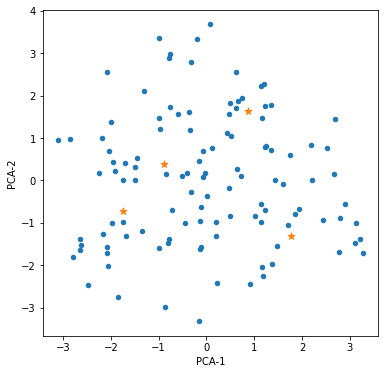

In [94]:
plt.figure(figsize=(6, 6))
plt.scatter(
    x = [x[0] for x in para_enc_2dim],
    y = [x[1] for x in para_enc_2dim],
    s = 20
)
plt.scatter(
    x = [x[0] for x in kmeans_centroids_2dim],
    y = [x[1] for x in kmeans_centroids_2dim],
    marker='*',
    s = 50
)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

##### Calculate Cosine Similarity

In [95]:
def cosine_sim(a, b):
    return np.dot(a, b) / (np.linalg.norm(a)*np.linalg.norm(b))

def row_cosine_sim(r):
    centroids = kmeans_centroids
    return [cosine_sim(r.para_enc, c) for c in centroids]

df['cosine_sim'] = df.progress_apply(lambda row: row_cosine_sim(row), axis=1)

100%|██████████| 113/113 [00:00<00:00, 7711.00it/s]


##### Find Best Paragraph for each Book, Chapter, Centroid

In [96]:
df.cosine_sim = df.cosine_sim.map(lambda c: np.array(c))

In [97]:
best_para_cosine = np.argmax(np.vstack(df.cosine_sim.tolist()), axis=0)
best_para_cosine

array([95, 23, 22, 73])

### Cosine Similarity

##### Expanding from Best Paragraph Based on Cosine Sim

In [98]:
df['para_num_tok'] =\
    df.para.map(lambda p: np.array(len(tokenizer.tokenize(p))))

In [99]:
def expand_based_on_cosine(df, best_para_cosine):
    max_length = len(df)
    max_idx = max_length-1
    
    extracted_para = []
    
    # Calculate the fraction we need to extract
    # based on total number of tokens in this chp
    # and number of centroids (sections) in this chp
    # do not go over the model max length
    cosine_sim = np.vstack(df.cosine_sim.tolist())
    para_num_tok = np.array(df.para_num_tok.tolist())
    num_tok_tot = sum(para_num_tok)
    num_tok_th = min(
        int(0.8*num_tok_tot / len(best_para_cosine)),
        0.9*tokenizer.model_max_length)
    
    for i, best in enumerate(best_para_cosine):
        merged_para_idx = [best]
        num_tok = para_num_tok[best]
        
        while num_tok < num_tok_th:
            if len(merged_para_idx) == max_length : break
            elif 0 in merged_para_idx:
                merged_para_idx.append(max(merged_para_idx)+1)
            elif max_idx in merged_para_idx:
                merged_para_idx.append(min(merged_para_idx)-1)
            else:
                if cosine_sim[min(merged_para_idx)-1, i] <\
                    cosine_sim[max(merged_para_idx)+1, i]:
                    merged_para_idx.append(max(merged_para_idx)+1)
                else:
                    merged_para_idx.append(min(merged_para_idx)-1)
            num_tok = np.sum(para_num_tok[merged_para_idx])
                  
        extracted_para.append(sorted(merged_para_idx))
        
    return extracted_para

selected_para_cosine = expand_based_on_cosine(df, best_para_cosine)

In [100]:
selected_para_cosine

[[93, 94, 95, 96, 97, 98, 99],
 [20, 21, 22, 23, 24, 25, 26, 27],
 [18, 19, 20, 21, 22, 23, 24, 25, 26],
 [67, 68, 69, 70, 71, 72, 73]]

### Merge Overlaps Summarization

In [101]:
selected_para_cosine[1] += selected_para_cosine[2]
selected_para_cosine[1] = sorted(list(set(selected_para_cosine[1])))
selected_para_cosine[2] = selected_para_cosine[3]
selected_para_cosine = selected_para_cosine[:3]

In [102]:
selected_para_cosine

[[93, 94, 95, 96, 97, 98, 99],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [67, 68, 69, 70, 71, 72, 73]]

In [103]:
selected_passage = []
for para_idx in selected_para_cosine:
    passage = ' '.join(df.para.iloc[para_idx].tolist())
    selected_passage.append(passage)

In [104]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

#model = AutoModelForSeq2SeqLM.from_pretrained(config.MAGMA_DIR+\
#    'fine-tuning/ft_pegasus_bull_para_embed_merged_overlaps_bybook_gas64_lr5e-05/checkpoint-539/')
#model = AutoModelForSeq2SeqLM.from_pretrained('google/pegasus-large')
model = AutoModelForSeq2SeqLM.from_pretrained('facebook/bart-large-cnn')

#tokenizer = AutoTokenizer.from_pretrained(config.MAGMA_DIR+\
#    'fine-tuning/ft_pegasus_bull_para_embed_merged_overlaps_bybook_gas64_lr5e-05/checkpoint-539/')
#tokenizer = AutoTokenizer.from_pretrained('google/pegasus-large')
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-cnn')

In [105]:
for s in selected_passage:
    print(len(tokenizer.tokenize(s)))

Token indices sequence length is longer than the specified maximum sequence length for this model (1047 > 1024). Running this sequence through the model will result in indexing errors


1047
1147
953


In [106]:
pars = model.config.task_specific_params.get('summarization', {})
model.config.update(pars)

In [107]:
selected_passage_summ = []
for passage in tqdm(selected_passage):
    summ = tokenizer.batch_decode(
        model.generate(
            tokenizer(passage, return_tensors='pt', truncation=True, padding='longest').input_ids,
            min_length = config.ONE_BULLET_MIN_LEN,
            num_beams = 6,
            early_stopping = True
        ), skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
    selected_passage_summ.append(summ)

100%|██████████| 3/3 [00:50<00:00, 16.69s/it]


In [108]:
for passage, summ in zip(selected_passage, selected_passage_summ):
    print(summ)
    print()
    print(''.join(['#']*100))
    print()

Models T5, BART and PEGASUS are studied on the Bullet-Paragraph dataset. A hyperparameter search to find the best GAS and learning rate combination is executed for all models. After this first step, the models are fine-tuned using the optimal parameters. For each model, the checkpoint achieving the best results is chosen.

####################################################################################################

Transformer models are pre-trained on a huge number of language tasks to develop abilities which can then be transferred to downstream tasks. Pre-training is typically done using unsupervised learning on unlabeled data. Because Transformers have an auto-regressive decoder, they can be directly fine-tuned for sequence generation tasks.

####################################################################################################

Chunk Chapter: The chapter is split in chunks, which are portions of the text, based on the number of tokens which can fit into the m